<a href="https://colab.research.google.com/github/njoromash/Data_Mining/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Text Mining, Sentiment Analysis, Topic Modelling, and Further Exploration"
author: "Your Name"
date: "Date"
output: html_document
---

# Task A – Text Mining

```{r setup, include=FALSE}
# Install and load required libraries
if (!require("tm")) install.packages("tm", repos = "http://cran.us.r-project.org")
if (!require("wordcloud")) install.packages("wordcloud", repos = "http://cran.us.r-project.org")
if (!require("tidytext")) install.packages("tidytext", repos = "http://cran.us.r-project.org")
if (!require("dplyr")) install.packages("dplyr", repos = "http://cran.us.r-project.org")
if (!require("ggplot2")) install.packages("ggplot2", repos = "http://cran.us.r-project.org")

library(tm)
library(wordcloud)
library(tidytext)
library(dplyr)
library(ggplot2)



In [ ]:
# Install necessary packages
if (!require("tm")) install.packages("tm", repos = "http://cran.us.r-project.org")
if (!require("wordcloud")) install.packages("wordcloud", repos = "http://cran.us.r-project.org")
if (!require("tidytext")) install.packages("tidytext", repos = "http://cran.us.r-project.org")
if (!require("dplyr")) install.packages("dplyr", repos = "http://cran.us.r-project.org")
if (!require("ggplot2")) install.packages("ggplot2", repos = "http://cran.us.r-project.org")

# Load libraries
library(tm)
library(wordcloud)
library(tidytext)
library(dplyr
library(ggplot2)


Loading required package: tm

Loading required package: NLP

Loading required package: wordcloud

Loading required package: RColorBrewer

Loading required package: tidytext

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate




# Load the data
file_path <- "/content/MS4S09_CW_Reviews.csv"
data <- read.csv(file_path)

# Inspect the dataset
str(data)


In [ ]:
# Load data
file_path <- "/content/MS4S09_CW_Reviews.csv"
data <- read.csv(file_path)

# View structure of the dataset
str(data)

# Select the description column for text mining
text_data <- data$description


'data.frame':	129971 obs. of  14 variables:
 $ X                    : int  0 1 2 3 4 5 6 7 8 9 ...
 $ country              : chr  "Italy" "Portugal" "US" "US" ...
 $ description          : chr  "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering un"| __truncated__ "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy r"| __truncated__ "Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp ac"| __truncated__ "Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with note"| __truncated__ ...
 $ designation          : chr  "Vulkà Bianco" "Avidagos" "" "Reserve Late Harvest" ...
 $ points               : int  87 87 87 87 87 87 87 87 87 87 ...
 $ price                : num  NA 15 14 13 65 15 16 24 12 27 ...
 $ province             : chr  "Sicily & Sardinia" "Douro" "Oregon" "

# Select the description column
text_data <- data$description

# Create a text corpus
corpus <- Corpus(VectorSource(text_data))

# Text preprocessing
corpus <- corpus %>%
  tm_map(content_transformer(tolower)) %>%
  tm_map(removePunctuation) %>%
  tm_map(removeNumbers) %>%
  tm_map(removeWords, stopwords("en")) %>%
  tm_map(stripWhitespace)

# Convert corpus to a dataframe
text_df <- data.frame(text = sapply(corpus, as.character), stringsAsFactors = FALSE)

# Tokenization and word frequency
word_counts <- text_df %>%
  unnest_tokens(word, text) %>%
  count(word, sort = TRUE)

# View word counts
head(word_counts)


In [ ]:
# Create a text corpus
corpus <- Corpus(VectorSource(text_data))

# Preprocess the text
corpus <- corpus %>%
  tm_map(content_transformer(tolower)) %>% # Convert to lowercase
  tm_map(removePunctuation) %>%            # Remove punctuation
  tm_map(removeNumbers) %>%                # Remove numbers
  tm_map(removeWords, stopwords("en")) %>% # Remove stopwords
  tm_map(stripWhitespace)                  # Remove extra whitespaces

# View the first few processed entries
inspect(corpus[1:5])


Warning message in tm_map.SimpleCorpus(., content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removeWords, stopwords("en")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] aromas include tropical fruit broom brimstone dried herb palate isnt overly expressive offering unripened apple citrus dried sage alongside brisk acidity                           
[2]  ripe fruity wine smooth still structured firm tannins filled juicy red berry fruits freshened acidity already drinkable although will certainly better                             
[3] tart snappy flavors lime flesh rind dominate green pineapple pokes crisp acidity underscoring flavors wine stainlesssteel fermented                                                 
[4] pineapple rind lemon pith orange blossom start aromas palate bit opulent notes honeydrizzled guava mango giving way slightly astringent semidry finish                              
[5] much like regular bottling comes across rather rough tannic rustic earthy herbal characteristics nonetheless think pleasantly unfussy country wine good comp

In [ ]:
# Convert corpus to a data frame for tokenization
text_df <- data.frame(text = sapply(corpus, as.character), stringsAsFactors = FALSE)

# Tokenize and count word frequencies
word_counts <- text_df %>%
  unnest_tokens(word, text) %>%
  count(word, sort = TRUE)

# View top words
head(word_counts)


,word,n
,<chr>,<int>
1,wine,78215
2,flavors,62782
3,fruit,45152
4,aromas,39638
5,palate,38105
6,acidity,34984


# Wordcloud visualization
wordcloud(words = word_counts$word,
          freq = word_counts$n,
          min.freq = 5,
          max.words = 100,
          random.order = FALSE,
          colors = brewer.pal(8, "Dark2"))

# Bar plot of word frequency
word_counts %>%
  filter(n > 10) %>%
  ggplot(aes(x = reorder(word, n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Word Frequency", x = "Words", y = "Frequency")


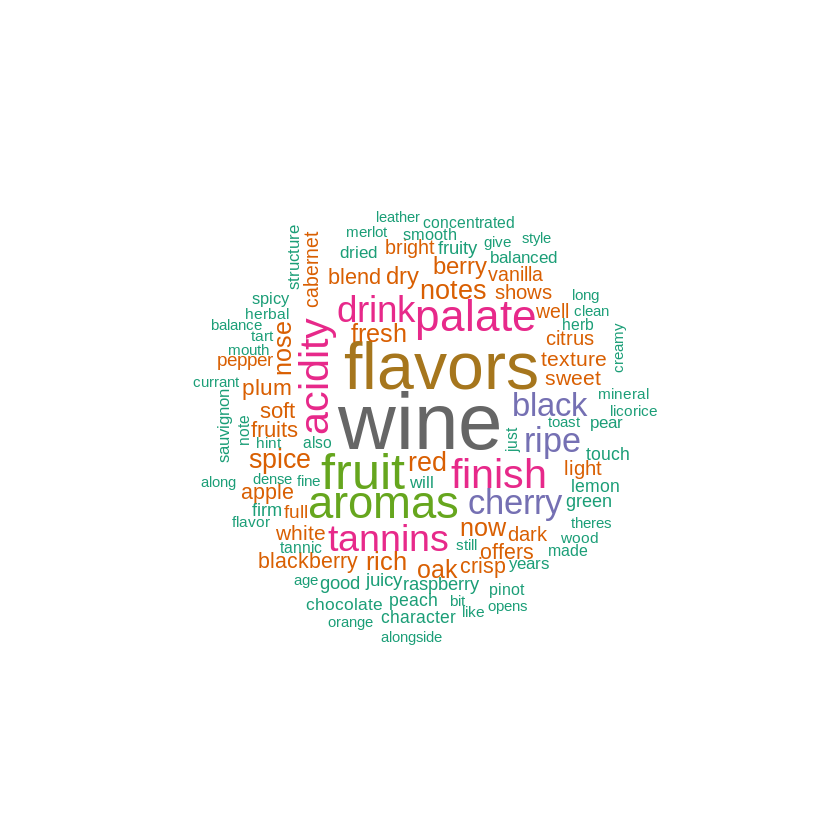

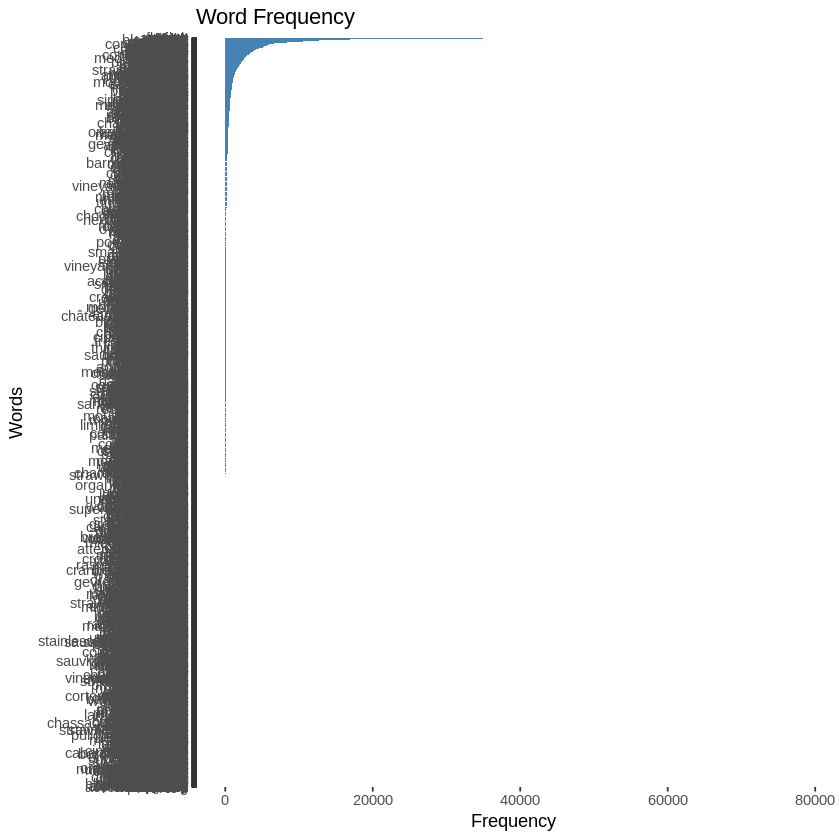

In [ ]:
# Wordcloud
wordcloud(words = word_counts$word,
          freq = word_counts$n,
          min.freq = 5,
          max.words = 100,
          random.order = FALSE,
          colors = brewer.pal(8, "Dark2"))

# Frequency plot
word_counts %>%
  filter(n > 10) %>%
  ggplot(aes(x = reorder(word, n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Word Frequency", x = "Words", y = "Frequency")


---
title: "Sentiment Analysis"
author: "Your Name"
output: html_document
---

```{r setup, include=FALSE}
knitr::opts_chunk$set(echo = TRUE)


# Install and load necessary libraries
if (!require("syuzhet")) install.packages("syuzhet", repos = "http://cran.us.r-project.org")
library(syuzhet)
library(tidytext)

# Prepare data for sentiment analysis
reviews_text <- as.character(data$description)

# Bing sentiment analysis
sentiment_data <- data %>%
  unnest_tokens(word, description) %>%
  inner_join(get_sentiments("bing"), by = "word") %>%
  count(sentiment)

# Display sentiment counts
head(sentiment_data)


In [ ]:
# Install syuzhet and its dependencies
install.packages("syuzhet", dependencies = TRUE, repos = "http://cran.us.r-project.org")

# Load syuzhet library
library(syuzhet)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pander’




In [ ]:
# Install and load all required libraries
required_packages <- c("syuzhet", "tidytext", "dplyr", "ggplot2")

for (pkg in required_packages) {
  if (!require(pkg, character.only = TRUE)) {
    install.packages(pkg, dependencies = TRUE, repos = "http://cran.us.r-project.org")
    library(pkg, character.only = TRUE)
  }
}


In [ ]:
# Install necessary packages
if (!require("syuzhet")) install.packages("syuzhet", repos = "http://cran.us.r-project.org")
if (!require("tidytext")) install.packages("tidytext", repos = "http://cran.us.r-project.org")
if (!require("dplyr")) install.packages("dplyr", repos = "http://cran.us.r-project.org")
if (!require("ggplot2")) install.packages("ggplot2", repos = "http://cran.us.r-project.org")

# Load libraries
library(syuzhet)
library(tidytext)
library(dplyr)
library(ggplot2)


In [ ]:
# Load data
file_path <- "/content/MS4S09_CW_Reviews.csv"
data <- read.csv(file_path)

# Extract the description column for analysis
text_data <- data$description


In [ ]:
# Load the dataset
file_path <- "/content/MS4S09_CW_Reviews.csv"
reviews_data <- read.csv(file_path, stringsAsFactors = FALSE)

# Inspect the structure of the dataset
str(reviews_data)


'data.frame':	129971 obs. of  14 variables:
 $ X                    : int  0 1 2 3 4 5 6 7 8 9 ...
 $ country              : chr  "Italy" "Portugal" "US" "US" ...
 $ description          : chr  "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering un"| __truncated__ "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy r"| __truncated__ "Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp ac"| __truncated__ "Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with note"| __truncated__ ...
 $ designation          : chr  "Vulkà Bianco" "Avidagos" "" "Reserve Late Harvest" ...
 $ points               : int  87 87 87 87 87 87 87 87 87 87 ...
 $ price                : num  NA 15 14 13 65 15 16 24 12 27 ...
 $ province             : chr  "Sicily & Sardinia" "Douro" "Oregon" "

In [ ]:
# **Check for the correct column name containing the text data**
# **Replace 'description' with the actual column name if different**
reviews_text <- reviews_data$description

# **Ensure reviews_text is a character vector**
reviews_text <- as.character(reviews_text)


In [ ]:
# Load the tidytext package for sentiment analysis
library(tidytext)

# Use the 'bing' lexicon for sentiment analysis (simpler and faster approach)
reviews_data_sentiment <- reviews_data %>%
  unnest_tokens(word, description) %>%  # Tokenize the reviews into individual words
  inner_join(get_sentiments("bing"), by = "word") %>%  # Join with the 'bing' sentiment lexicon
  count(sentiment) %>%  # Count the occurrences of positive and negative words
  spread(sentiment, n, fill = 0)  # Pivot the sentiment data into columns

# Classify sentiments based on the balance of positive and negative words
reviews_data$sentiment_class <- ifelse(reviews_data_sentiment$positive > reviews_data_sentiment$negative, "Positive",
                                       ifelse(reviews_data_sentiment$positive < reviews_data_sentiment$negative, "Negative", "Neutral"))


In [ ]:
# Check column names to verify if 'date' exists
colnames(reviews_data)


[1] "X"                     "country"               "description"          
 [4] "designation"           "points"                "price"                
 [7] "province"              "region_1"              "region_2"             
[10] "taster_name"           "taster_twitter_handle" "title"                
[13] "variety"               "winery"                "sentiment_class"

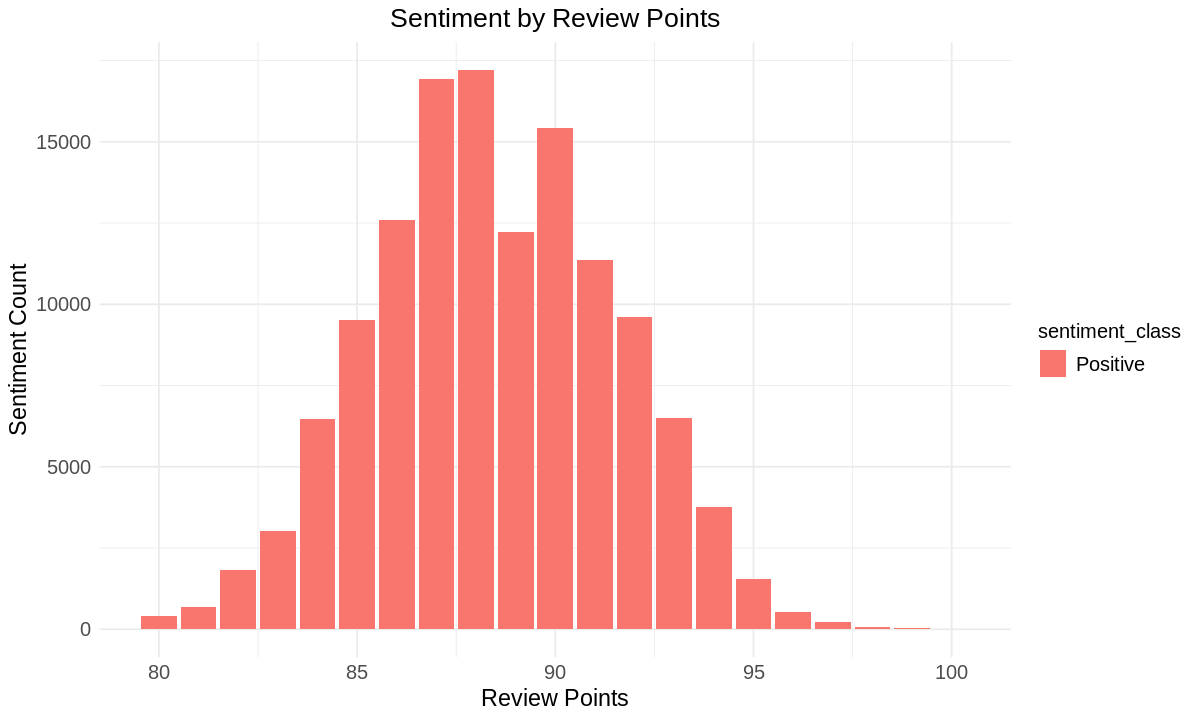

In [ ]:
# Summarize sentiment by points
sentiment_by_points <- reviews_data %>%
  group_by(points, sentiment_class) %>%
  summarise(count = n(), .groups = 'drop')  # Count sentiment occurrences for each point value

# Plot sentiment by points with improved readability
sentiment_by_points_plot <- ggplot(sentiment_by_points, aes(x = points, y = count, fill = sentiment_class)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Sentiment by Review Points", x = "Review Points", y = "Sentiment Count") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 12),  # Increase x-axis text size
    axis.text.y = element_text(size = 12),  # Increase y-axis text size
    axis.title.x = element_text(size = 14),  # Increase x-axis title size
    axis.title.y = element_text(size = 14),  # Increase y-axis title size
    plot.title = element_text(size = 16, hjust = 0.5),  # Increase plot title size and center it
    legend.title = element_text(size = 12),  # Increase legend title size
    legend.text = element_text(size = 12)  # Increase legend text size
  )

# Adjust plot size before printing
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as needed

# Show the sentiment by points plot
print(sentiment_by_points_plot)


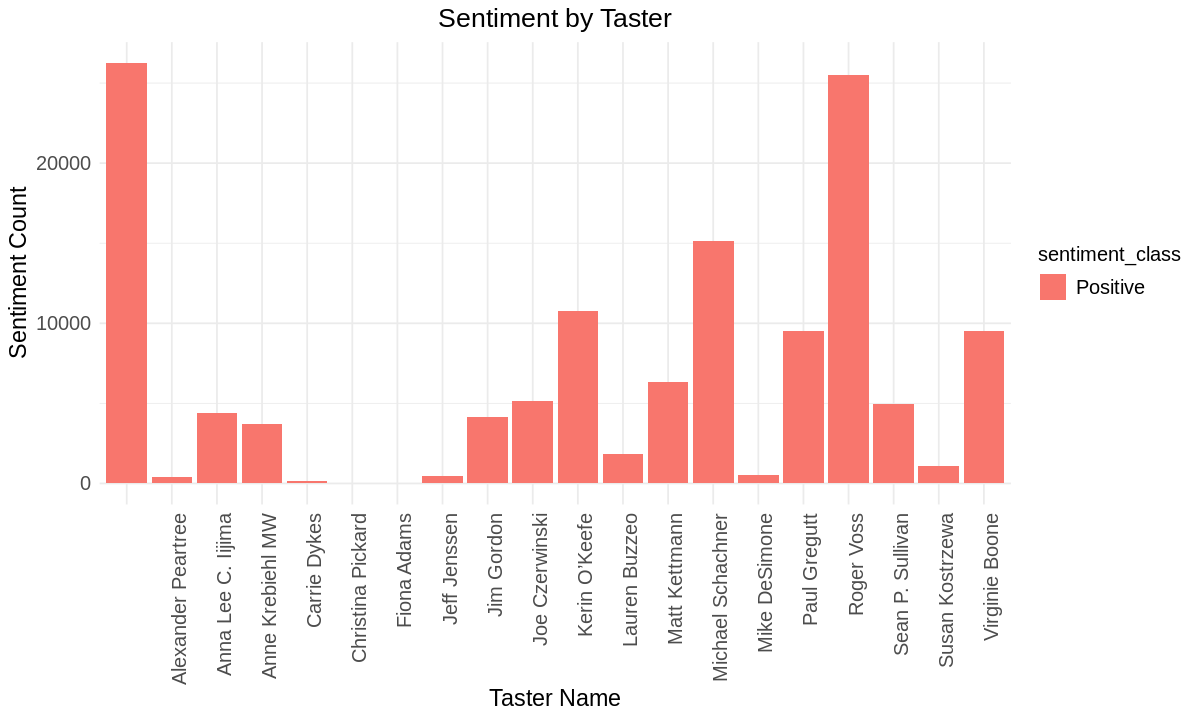

In [ ]:
# Summarize sentiment by taster_name
sentiment_by_taster <- reviews_data %>%
  group_by(taster_name, sentiment_class) %>%
  summarise(count = n(), .groups = 'drop')  # Count sentiment occurrences for each taster

# Plot sentiment by taster_name with larger font size for better readability
sentiment_by_taster_plot <- ggplot(sentiment_by_taster, aes(x = taster_name, y = count, fill = sentiment_class)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Sentiment by Taster", x = "Taster Name", y = "Sentiment Count") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 12),  # Increase x-axis text size
    axis.text.y = element_text(size = 12),  # Increase y-axis text size
    axis.title.x = element_text(size = 14),  # Increase x-axis title size
    axis.title.y = element_text(size = 14),  # Increase y-axis title size
    plot.title = element_text(size = 16, hjust = 0.5),  # Increase plot title size and center it
    legend.title = element_text(size = 12),  # Increase legend title size
    legend.text = element_text(size = 12)  # Increase legend text size
  ) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))  # Rotate labels if necessary

# Show the sentiment by taster plot
print(sentiment_by_taster_plot)


# A tibble: 129,971 × 3
   row_number sentiment_class count
        <int> <chr>           <int>
 1          1 Positive            1
 2          2 Positive            1
 3          3 Positive            1
 4          4 Positive            1
 5          5 Positive            1
 6          6 Positive            1
 7          7 Positive            1
 8          8 Positive            1
 9          9 Positive            1
10         10 Positive            1
# ℹ 129,961 more rows


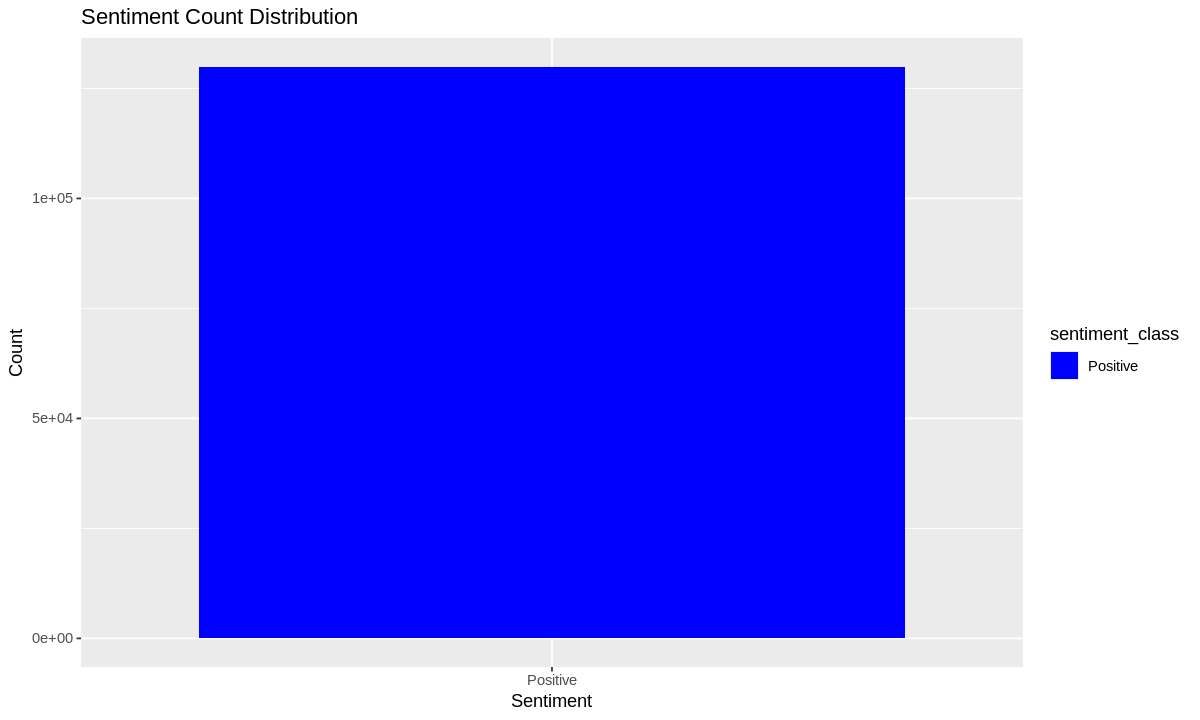

In [ ]:
# 2. Bar plot of sentiment counts
sentiment_count_plot <- ggplot(reviews_data, aes(x = sentiment_class, fill = sentiment_class)) +
  geom_bar() + # Remove the fill argument here
  scale_fill_manual(values = c("Positive" = "blue", "Negative" = "red", "Neutral" = "gray")) + # Map colors manually
  labs(title = "Sentiment Count Distribution", x = "Sentiment", y = "Count")

# Show the visualizations
print(sentiment_over_time)
print(sentiment_count_plot)

In [ ]:
# Load dataset
file_path <- "/content/MS4S09_CW_Reviews.csv"
data <- read.csv(file_path)

# Preview dataset
head(data)


,X,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
2,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
5,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks
6,5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15,Northern Spain,Navarra,,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem


In [ ]:
# Load necessary libraries
library(tidyverse)
library(tidytext)

# Load the data
file_path <- "/content/MS4S09_CW_Reviews.csv"
reviews <- read.csv(file_path, stringsAsFactors = FALSE)

# Preprocess text: remove stopwords, punctuation, and tokenize
cleaned_reviews <- reviews %>%
  unnest_tokens(word, description) %>% # Use 'description' column for reviews
  anti_join(stop_words) %>%
  filter(!word %in% c("punctuation_to_remove")) # Add specific punctuation to remove if needed


Joining with `by = join_by(word)`


# Install necessary packages
if (!require("topicmodels")) install.packages("topicmodels", repos = "http://cran.us.r-project.org")
library(topicmodels)

# Tokenize and remove stopwords
cleaned_reviews <- data %>%
  unnest_tokens(word, description) %>%
  anti_join(stop_words)

# Create Document-Term Matrix
dtm <- cleaned_reviews %>%
  count(doc_id = row_number(), word) %>%
  cast_dtm(doc_id, word, n)


In [ ]:
# Load necessary libraries
library(tidyverse)
library(tidytext)

# Load the data
file_path <- "/content/MS4S09_CW_Reviews.csv"
reviews <- read.csv(file_path, stringsAsFactors = FALSE)

# Add a document ID column
reviews <- reviews %>%
  mutate(doc_id = row_number()) # Create unique document IDs

# Tokenize the text, remove stopwords, and clean up
cleaned_reviews <- reviews %>%
  unnest_tokens(word, description) %>% # Tokenize the 'description' column
  anti_join(stop_words) %>%            # Remove stopwords
  filter(!word %in% c("punctuation_to_remove")) # Remove custom punctuation if needed

# Check the structure of cleaned_reviews
head(cleaned_reviews)


Joining with `by = join_by(word)`


,X,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,doc_id,word
,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,0,Italy,Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,1,aromas
2,0,Italy,Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,1,include
3,0,Italy,Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,1,tropical
4,0,Italy,Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,1,fruit
5,0,Italy,Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,1,broom
6,0,Italy,Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,1,brimstone


In [ ]:
# Create Document-Term Matrix (DTM)
dtm <- cleaned_reviews %>%
  count(doc_id, word) %>% # Count word frequencies by document
  cast_dtm(doc_id, word, n) # Create DTM with document ID, terms, and counts

# Check the structure of the DTM
print(dtm)


<<DocumentTermMatrix (documents: 129971, terms: 32801)>>
Non-/sparse entries: 2881569/4260297202
Sparsity           : 100%
Maximal term length: 20
Weighting          : term frequency (tf)


In [ ]:
install.packages("textmineR") # Install the package
library(textmineR)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ISOcodes’, ‘RcppEigen’, ‘gtools’, ‘stopwords’, ‘RcppProgress’, ‘RSpectra’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘textmineR’


The following object is masked from ‘package:Matrix’:

    update


The following object is masked from ‘package:stats’:

    update




In [ ]:
install.packages("tidyverse")   # For data wrangling
install.packages("tidytext")    # For text tokenization
install.packages("Matrix")      # For sparse matrix
install.packages("textmineR")   # Alternative to topicmodels

library(tidyverse)
library(tidytext)
library(Matrix)
library(textmineR)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("Matrix"):
“installation of package ‘Matrix’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("textmineR"):
“installation of package ‘textmineR’ had non-zero exit status”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted packa

In [ ]:
# Load necessary libraries
library(tidyverse)
library(readr)

# Read the CSV file
file_path <- "/content/MS4S09_CW_Reviews.csv"
reviews_data <- read_csv(file_path)

# View the first few rows to understand the structure
head(reviews_data)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
New names:
• `` -> `...1`
Rows: 129971 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): country, description, designation, province, region_1, region_2, t...
dbl  (3): ...1, points, price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,NA,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,NA,NA,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NA,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NA,Alexander Peartree,NA,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks
5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15,Northern Spain,Navarra,NA,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem


In [ ]:
# Load text mining libraries
library(tidytext)

# Tokenize words from the description column
tokens <- reviews_data %>%
  select(description) %>%
  unnest_tokens(word, description)

# Remove stop words
data("stop_words")
filtered_tokens <- tokens %>%
  anti_join(stop_words)

# Count most frequent words
frequent_words <- filtered_tokens %>%
  count(word, sort = TRUE) %>%
  top_n(15)

# View the result
print(frequent_words)


Joining with `by = join_by(word)`
Selecting by n


# A tibble: 15 × 2
   word        n
   <chr>   <int>
 1 wine    78322
 2 flavors 62791
 3 fruit   49927
 4 aromas  39639
 5 palate  38437
 6 acidity 34999
 7 finish  34971
 8 tannins 30877
 9 drink   30318
10 cherry  29321
11 black   29020
12 ripe    27375
13 red     21782
14 spice   19233
15 notes   19045


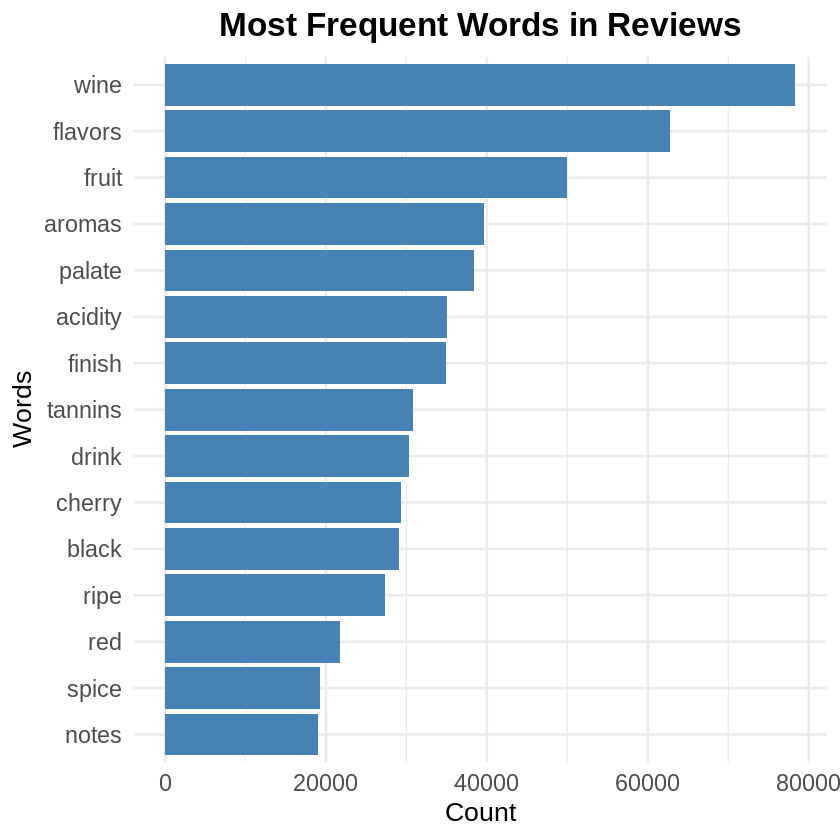

In [ ]:
# Visualize frequent words with improved readability
ggplot(frequent_words, aes(x = reorder(word, n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Most Frequent Words in Reviews",
    x = "Words",
    y = "Count"
  ) +
  theme_minimal(base_size = 16) + # Increase the base text size
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5), # Larger, centered title
    axis.title = element_text(size = 16), # Larger axis titles
    axis.text = element_text(size = 14)   # Larger axis text
  )


In [ ]:
# Tokenize words from the description column while keeping the country column
tokens <- reviews_data %>%
  select(country, description) %>% # Retain the country column
  unnest_tokens(word, description)

# Remove stop words
data("stop_words")
filtered_tokens <- tokens %>%
  anti_join(stop_words, by = "word")

# Perform sentiment analysis using Bing lexicon
library(tidyr)
sentiments <- filtered_tokens %>%
  inner_join(get_sentiments("bing"), by = "word") %>%
  count(country, sentiment) %>% # Group by country and sentiment
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
  mutate(sentiment_score = positive - negative)

# View the sentiment scores
print(sentiments)


# A tibble: 44 × 4
   country                negative positive sentiment_score
   <chr>                     <int>    <int>           <int>
 1 Argentina                  4938     6734            1796
 2 Armenia                       0        4               4
 3 Australia                  1782     5561            3779
 4 Austria                    2632    11765            9133
 5 Bosnia and Herzegovina        0        8               8
 6 Brazil                       93       66             -27
 7 Bulgaria                     99      333             234
 8 Canada                      229      707             478
 9 Chile                      5490     8530            3040
10 China                         1        1               0
# ℹ 34 more rows
